In [ ]:

function finite_difference(X,Y,xn,kind="forward")
    #= 
    X,Y are points of a Table Function to Interpolation
    xn are new points that must be in X's range,
     "kind" parameter specifies type of finite difference:[ forward / backward ]
     
    =#
    n=length(X) #number of elements
    
    #checking whether xn is in range of X or not
    for i=1:length(xn)
        (xn[i]<X[1] || xn[i]>X[n]) && error("Your data is out of bound!!!")
        break
    end
    
    
    
    
    h=(X[n]-X[1])/(n-1)  # steps
    t=ones(length(xn),n) # create a matrix(length(xn),n) to calculate finite difference's coefficients(binomial coefficients)
    
    #create Differences Matrix ---------------
    d=zeros(n,n)
    d[:,1]=Y #first column is Y
    
    for j=2:n #other columns
        for i=1:(n-j+1) 
            d[i,j]=(d[i+1,j-1]-d[i,j-1])
        end
    end
    
    s=zeros(length(xn),1)
    #----------------------------------------------Forward------------------------------------------------------
    if kind=="forward"  
        for i=1:size(s,1)
            s[i]=(xn[i]-X[1])/h #calculate forward moving terms
        end
        
        for i=1:length(xn),j=1:n-1
            t[i,j+1]=(s[i]-j+1)/j
        end
        
        f=d[1,:] # get first row for generating newton finite difference serie
        
        #=
        t dimension  is (length(xn),n) and
        f dimension is (n,1)
        so, we multiply t*f
        =#
        
        p=cumprod(t,dims=2)*f   # xn points values on this Interpolation
        
        #------------------------------------------Backward----------------------------------------------------
    elseif kind=="backward" 
        for i=1:size(s,1)
            s[i]=(xn[i]-X[n])/h
        end
        
        for i=1:length(xn),j=1:n-1
            t[i,j+1]=(s[i]+j-1)/j
        end
        #------------------------------------
                # backward method move from end of table,so you must get last elements of Difference Matrix------

        b=ones(n,1)
        m=n
        
        for i=1:n
            b[i]=d[m,i]
            m=m-1
        end
        # --------------------------------------------------
        
        p=cumprod(t,dims=2)*b
  
    
    end
    
     
    
end

        
   
        

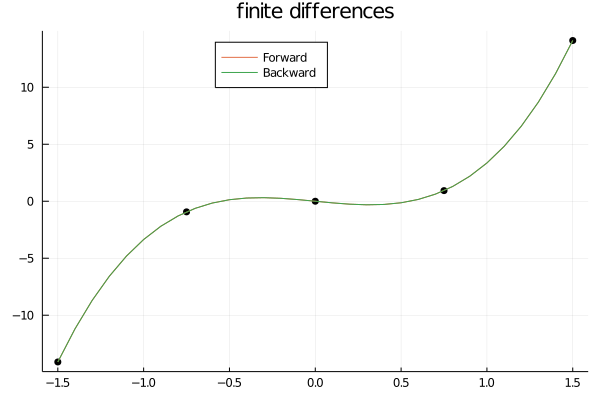

In [12]:
using Plots
X= [-1.5, -.75, 0, .75 ,1.5]
Y=[-14.1014 ,-0.931596 ,0 ,0.931596 ,14.1014]
xn=-1.5:.1:1.5
y_xn_f=finite_difference(X,Y,xn,"forward")
y_xn_b=finite_difference(X,Y,xn,"backward")

gr()
scatter(X,Y,title="finite differences",color=:black,label=:false)
plot!(xn,y_xn_f,label="Forward",coloralpha=2)
plot!(xn,y_xn_b,label="Backward",coloralpha=2,legend=:top)

